In [23]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import iqr
import seaborn as sns

# Reading in each csv file for the imputed data
data = pd.read_csv('imputed_data.csv', encoding = 'ISO-8859-1')
data.head()

,Unnamed: 0,year,state,income,18_months,pay_method_ACH,pay_method_credit card,pay_method_paper check,region_central,region_north_east,region_rocky,region_south,region_south_east,region_west,status_Active,status_Decline,status_Returned,status_Returned_90
0,0,2014.0,north_east,36250.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,1,2015.0,north_east,36250.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,2,2016.0,north_east,36250.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,3,2016.0,north_east,36250.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,5,2014.0,north_east,74083.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [24]:
# Separating out the y variable and selecting the 'income' column to be normalized
Y = data['18_months']
outlier_data = data[['income']]
data = data.drop(['income', '18_months', 'Unnamed: 0'], axis=1)

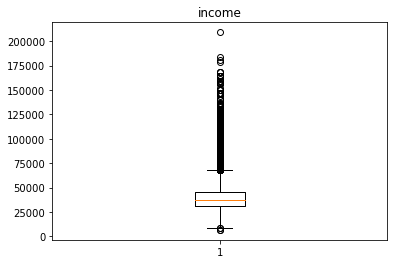

In [25]:
# Creating a boxplot for the 'income' column
plt.boxplot(outlier_data['income'])    
# Naming the box plot after the name of the column     
plt.title('income')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9a8fee1898>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9a8fee4198>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9a8fee1860>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9a8fed6898>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9a8fed6518>],
 'means': []}

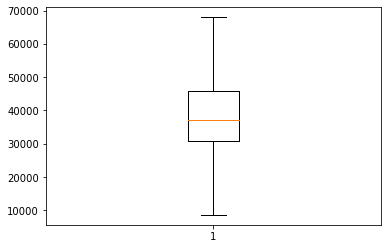

In [26]:
# Defining the function 'outlier' to help with major outliers in the 'income' column

def outlier(x):
    if x > (Q3 + (1.5*IQR)):
        x=Q3
    elif x <(Q1 - (1.5*IQR)):
        x=Q1
    else:
        pass
    return(x)

# Setting the Q1 and Q3 variables to the necessary quartiles
Q1 = outlier_data['income'].quantile(0.25)
Q3 = outlier_data['income'].quantile(0.75)
IQR = iqr(outlier_data['income'])

# Applying the function above to the income column
outlier_data['income'] = outlier_data['income'].apply(lambda x: outlier(x))

# Plotting the box plot
plt.boxplot(outlier_data['income'])

In [27]:
# Showing the pre-normalized mean of the 'income' data
outlier_data.mean()

income    38260.298414
dtype: float64

In [28]:
# Creating the column name to be inputed into the new normalized data
norm_cols = ['income']

# Normalizing the two columns in 'outlier_data' using the MinMax function
minmax = preprocessing.MinMaxScaler()
norm = (minmax.fit_transform(outlier_data))
norm = pd.DataFrame(norm, columns=norm_cols)

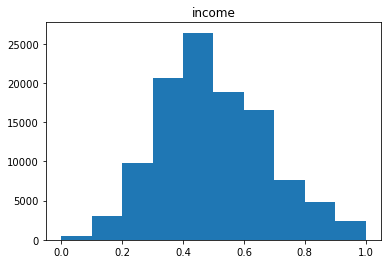

In [29]:
# Creating a histogram for the 'income' column
plt.hist(norm['income'])    
# Naming the box plot after the name of the column     
plt.title('income')
plt.show()

In [30]:
# Showing the normalized mean of the 'income' data
norm.mean()

income    0.499348
dtype: float64

In [31]:
# Combining the two datasets (original and normalized) back into one
data = pd.concat([data, norm, Y], axis = 1)
data.head()

,year,state,pay_method_ACH,pay_method_credit card,pay_method_paper check,region_central,region_north_east,region_rocky,region_south,region_south_east,region_west,status_Active,status_Decline,status_Returned,status_Returned_90,income,18_months
0,2014.0,north_east,0,1,0,0,1,0,0,0,0,0,0,0,1,0.465506,0
1,2015.0,north_east,0,1,0,0,1,0,0,0,0,0,0,0,1,0.465506,0
2,2016.0,north_east,0,1,0,0,1,0,0,0,0,0,0,0,0,0.465506,0
3,2016.0,north_east,0,1,0,0,1,0,0,0,0,0,0,0,1,0.465506,0
4,2014.0,north_east,0,1,0,0,1,0,0,0,0,0,1,0,0,0.624609,0


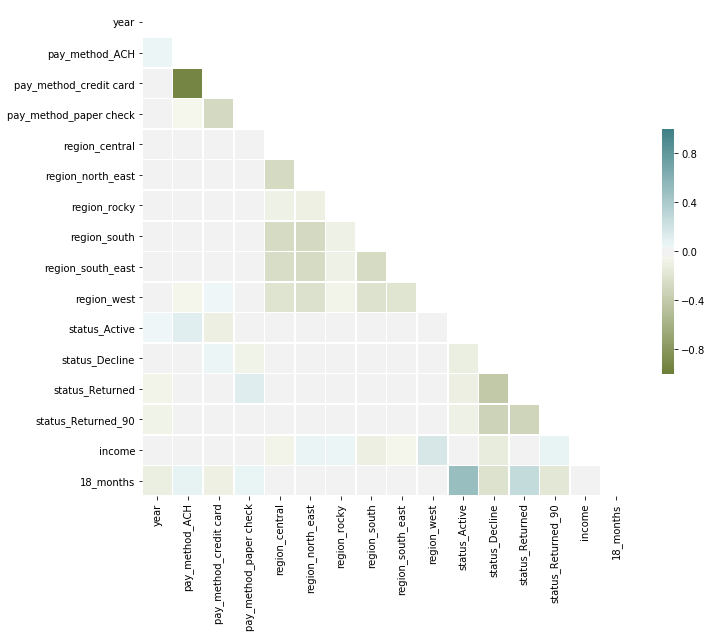

In [32]:
# I AM USING THIS CODE FROM COMPETITION 2 OF OUR DATA MINING PROJECT

# Setting the correlation matrix equal to a variable 
# in order to visualize it
correlation_visual = data.corr(method='spearman')

# Hiding the top half of the correlation matrix to make
# it easier to read
hide = np.zeros_like(correlation_visual, dtype=np.bool)
hide[np.triu_indices_from(hide)] = True

# Setting the subplot for the correlation matrix
f , ax = plt.subplots(figsize=(11,9))

# Generating a diverging colormap
cmap = sns.diverging_palette(100, 200, as_cmap=True)

# Putting in the heatmap element of the correlation visualization
sns.heatmap(correlation_visual, mask=hide, cmap=cmap, vmin=-1,vmax=1, center=0, square=True, 
            linewidths=.6, cbar_kws={"shrink": .5})

In [33]:
# Exporting the imputed and normalized dataset to a csv file 
# to be used in the other classification models
data.to_csv('final_data.csv',',')